
# Stock Portfolio Performance Analysis and Prediction
# -------------------------

### Introduction
#####

#### The Stock portfolio performance dataset was obtained from the UCI machine learning repository.

#### The project aims to analyze the performance of stock, annual returns, risks, win rates, find the relationship between stock pricing concepts and performances of the portfolios.
#### Our main objective is to discover the optimal combination of weights of stock pricing concepts and predict the absolute win rate of a stock. 
#####
#### This project will be carried out utilizing the following steps;
#### a) Data Wrangling and cleaning
#### b) Exploratory Data Analysis
#### c) Regression analysis
#### d) Results
#### e) Conclusion


## A) Preliminary Data Wrangling

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset

from google.colab import files
uploaded = files.upload()

Saving stock portfolio performance data set (2).xlsx to stock portfolio performance data set (2).xlsx


In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [4]:
file_name = 'stock portfolio performance data set (2).xlsx'
print(pd.ExcelFile(file_name).sheet_names)

['4th period', '3rd period', '2nd period', '1st period', 'all period', 'Time frame']


In [5]:
df= pd.read_excel('stock portfolio performance data set (2).xlsx', sheet_name ='all period')
df.head(5)

,Unnamed: 0,the weight of the stock-picking concept,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,the original investment performance indicator,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,the normalized investment performance indicator,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
1,1,1,0,0,0,0,0,0.139,0.01,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.8,0.52,0.411765
2,2,0,1,0,0,0,0,0.143,0.01,1.17,0.108,0.663,0.65,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
3,3,0,0,1,0,0,0,0.173,0.018,1.3,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
4,4,0,0,0,1,0,0,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.8,0.756046,0.36,0.270588


In [6]:
#Assign a new header to the dataset

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 

In [7]:
#Check the first 5 columns
df.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
1,1,1,0,0,0,0,0,0.139,0.01,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.8,0.52,0.411765
2,2,0,1,0,0,0,0,0.143,0.01,1.17,0.108,0.663,0.65,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
3,3,0,0,1,0,0,0,0.173,0.018,1.3,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
4,4,0,0,0,1,0,0,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.8,0.756046,0.36,0.270588
5,5,0,0,0,0,1,0,0.096,0.001,1.04,0.087,0.725,0.538,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [8]:
#Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 1 to 63
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   ID                                       63 non-null     object
 1    Large B/P                               63 non-null     object
 2    Large ROE                               63 non-null     object
 3    Large S/P                               63 non-null     object
 4    Large Return Rate in the last quarter   63 non-null     object
 5    Large Market Value                      63 non-null     object
 6    Small systematic Risk                   63 non-null     object
 7   Annual Return                            63 non-null     object
 8   Excess Return                            63 non-null     object
 9   Systematic Risk                          63 non-null     object
 10  Total Risk                               63 non-null     object


In [9]:
#Check for all missing values
df.isnull().sum()

0
ID                                         0
 Large B/P                                 0
 Large ROE                                 0
 Large S/P                                 0
 Large Return Rate in the last quarter     0
 Large Market Value                        0
 Small systematic Risk                     0
Annual Return                              0
Excess Return                              0
Systematic Risk                            0
Total Risk                                 0
Abs. Win Rate                              0
Rel. Win Rate                              0
Annual Return.1                            0
Excess Return.1                            0
Systematic Risk.1                          0
Total Risk.1                               0
Abs. Win Rate.1                            0
Rel. Win Rate.1                            0
dtype: int64

In [10]:
df.describe().T

,count,unique,top,freq
0,,,,
ID,63.0,63.0,1.000000,1.0
Large B/P,63.0,7.0,0.000000,31.0
Large ROE,63.0,7.0,0.000000,31.0
Large S/P,63.0,7.0,0.000000,31.0
Large Return Rate in the last quarter,63.0,7.0,0.000000,31.0
Large Market Value,63.0,7.0,0.000000,31.0
Small systematic Risk,63.0,7.0,0.000000,31.0
Annual Return,63.0,43.0,0.138000,5.0
Excess Return,63.0,25.0,0.015000,5.0


In [11]:
df.columns

Index(['ID', ' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return', 'Excess Return',
       'Systematic Risk', 'Total Risk', 'Abs. Win Rate', 'Rel. Win Rate',
       'Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object', name=0)

In [12]:
#Replacing the characters in column names
df.columns = [c.replace(' ', '_') for c in df.columns]
df

,ID,_Large_B/P_,_Large_ROE_,_Large_S/P_,_Large_Return_Rate_in_the_last_quarter_,_Large_Market_Value_,_Small_systematic_Risk,Annual_Return,Excess_Return,Systematic_Risk,Total_Risk,Abs._Win_Rate,Rel._Win_Rate,Annual_Return.1,Excess_Return.1,Systematic_Risk.1,Total_Risk.1,Abs._Win_Rate.1,Rel._Win_Rate.1
1,1,1,0,0,0,0,0,0.139,0.01,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.8,0.52,0.411765
2,2,0,1,0,0,0,0,0.143,0.01,1.17,0.108,0.663,0.65,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
3,3,0,0,1,0,0,0,0.173,0.018,1.3,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
4,4,0,0,0,1,0,0,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.8,0.756046,0.36,0.270588
5,5,0,0,0,0,1,0,0.096,0.001,1.04,0.087,0.725,0.538,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,0.2,0.2,0.2,0,0.2,0.2,0.171,0.022,0.94,0.1,0.7,0.638,0.685397,0.706792,0.322843,0.329431,0.64,0.729412
60,60,0.2,0.2,0,0.2,0.2,0.2,0.153,0.018,0.88,0.087,0.725,0.638,0.595786,0.631599,0.259952,0.204156,0.72,0.729412
61,61,0.2,0,0.2,0.2,0.2,0.2,0.156,0.018,0.97,0.104,0.663,0.525,0.612546,0.631119,0.35973,0.368958,0.52,0.411765
62,62,0,0.2,0.2,0.2,0.2,0.2,0.161,0.018,0.98,0.094,0.688,0.663,0.635785,0.634402,0.362039,0.277221,0.6,0.8


In [13]:
df.columns

Index(['ID', '_Large_B/P_', '_Large_ROE_', '_Large_S/P_',
       '_Large_Return_Rate_in_the_last_quarter_', '_Large_Market_Value_',
       '_Small_systematic_Risk', 'Annual_Return', 'Excess_Return',
       'Systematic_Risk', 'Total_Risk', 'Abs._Win_Rate', 'Rel._Win_Rate',
       'Annual_Return.1', 'Excess_Return.1', 'Systematic_Risk.1',
       'Total_Risk.1', 'Abs._Win_Rate.1', 'Rel._Win_Rate.1'],
      dtype='object')

In [14]:
#Renaming columns to aid visualization
df.columns = [c.replace('.', '') for c in df.columns]
df.columns

Index(['ID', '_Large_B/P_', '_Large_ROE_', '_Large_S/P_',
       '_Large_Return_Rate_in_the_last_quarter_', '_Large_Market_Value_',
       '_Small_systematic_Risk', 'Annual_Return', 'Excess_Return',
       'Systematic_Risk', 'Total_Risk', 'Abs_Win_Rate', 'Rel_Win_Rate',
       'Annual_Return1', 'Excess_Return1', 'Systematic_Risk1', 'Total_Risk1',
       'Abs_Win_Rate1', 'Rel_Win_Rate1'],
      dtype='object')

In [15]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

##### Dataset looking good!

### The feature(s) of interest are;

#### B/P - Companies use the price-to-book ratio (P/B ratio) to compare a firm's market capitalization to its book value. The price-to-book ratio is often used by value investors looking for stocks that are underpriced by the market.
#### ROE - Return on equity (ROE) is calculated by dividing a company's net income by its shareholders' equity, thereby arriving at a measure of how efficient a company is in generating profits
#### A rate of return is the gain or loss of an investment over a specified period of time, expressed as a percentage of the investment's cost.
#### Systematic risk, also known as market risk - This is the risk that is inherent to the entire market, rather than a particular stock or industry sector.
#### The win-rate - This is a number of profitable trades during a certain period of time in the general number of executed trades for the same period of time.
#### Annual_return - The annual rate of return is the profit or loss on an investment over a one-year period.
#### Excess_return - The excess returns are the return earned by a stock (or portfolio of stocks) and the risk free rate.
#### Market value - This can be said as the investment given to specific equity or a business; the price an asset can fetch in the    marketplace.

### Insight

#### a) It is given that the all-period time frame is a period of 20 years

### B) Exploratory Data Analysis

#### Univariate exploration

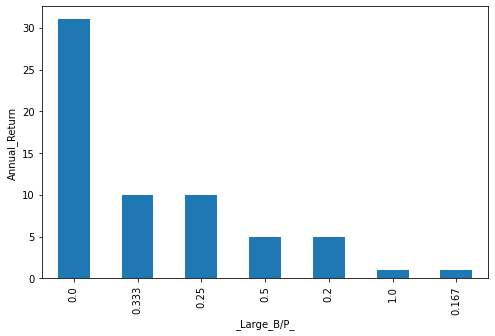

In [16]:
# A quick look at the B/P ratio and Annual return using a bar chart;

plt.figure(figsize = [8, 5]) 
df['_Large_B/P_'].value_counts().plot.bar()
plt.xlabel('_Large_B/P_')
plt.ylabel('Annual_Return')
plt.show()

#### From the bar chart, it can be deduced the smaller the P/B ratio the higher the future returns, while the higher the P/B ratio, the smaller the annual return

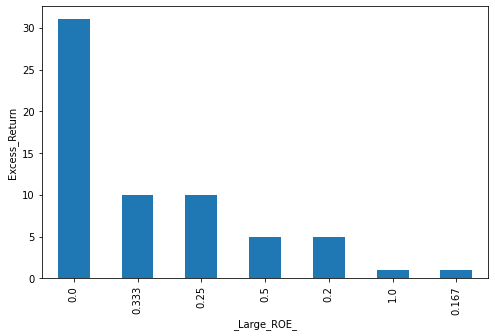

In [17]:
# A quick look at the ROE and Excess return using a bar chart;

plt.figure(figsize = [8, 5]) 
df['_Large_ROE_'].value_counts().plot.bar()
plt.xlabel('_Large_ROE_')
plt.ylabel('Excess_Return')
plt.show()

#### From the bar chart, it shows the higher the ROE, the smaller the excess return. 

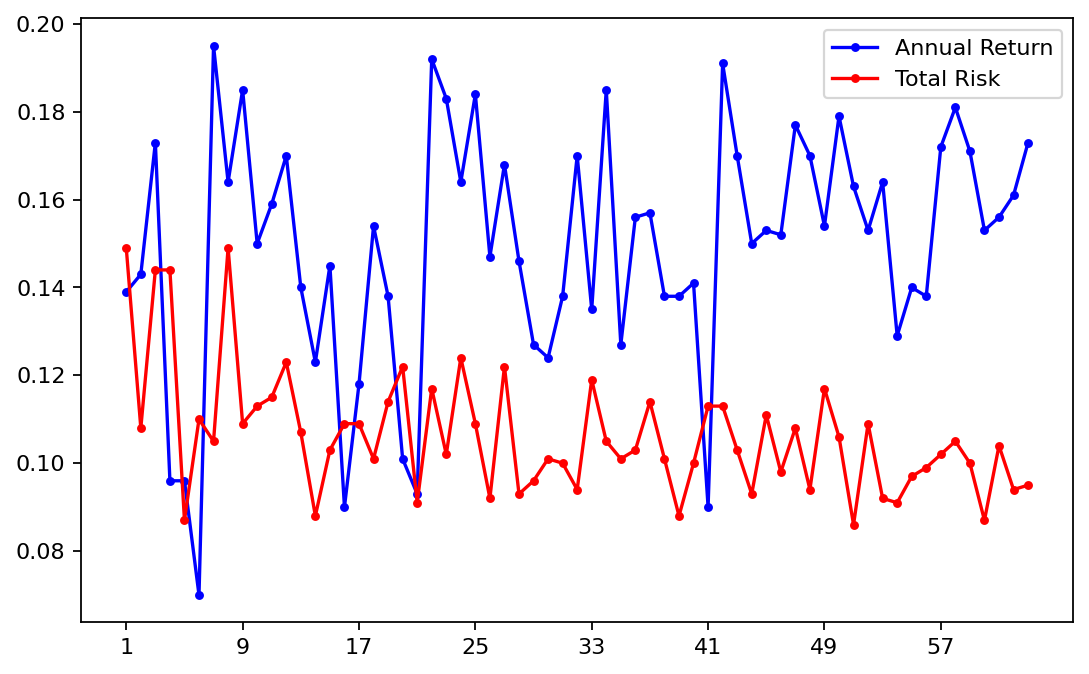

In [18]:
plt.figure(figsize=(8,5),dpi=160)


plt.plot(df.ID, df.Annual_Return, 'b.-', label='Annual Return')
plt.plot(df.ID, df.Total_Risk, 'r.-',label='Total Risk')


plt.xticks(df.ID[::8].tolist())

# plt.xlabel('ID')
# plt.ylabel('')

plt.legend()


plt.show()

##### From the above plot diagram, it can be seen that the annual return peaked at a climax within the range of  0.19 at 3 intervals. The maximum decline was observed  within the range of 0.3, which followed by a sharp peak at 0.19

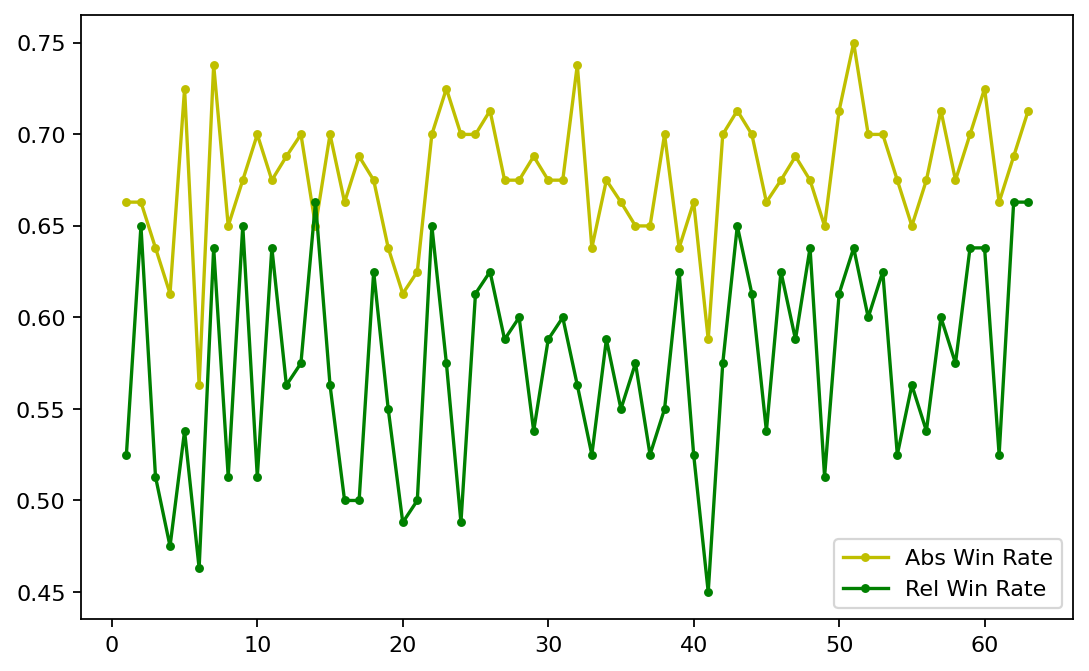

In [19]:
plt.figure(figsize=(8,5),dpi=160)
plt.plot(df.ID, df.Abs_Win_Rate, 'y.-',label='Abs Win Rate')
plt.plot(df.ID, df.Rel_Win_Rate, 'g.-',label='Rel Win Rate')
plt.legend()


plt.show()

#### From the above plot chart, it is observed that the absolute win rate is higher than the relative win rate.

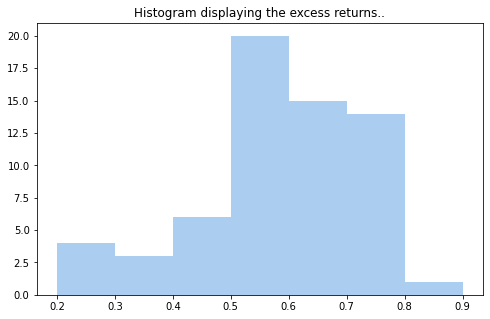

In [20]:
bins = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(8,5))

plt.hist(df.Excess_Return1, bins=bins, color='#abcdef')

plt.xticks(bins)

plt.title('Histogram displaying the excess returns..')


plt.show()

#### The above histogram shows that the most values are between 0.5 - 0.6, which is the peak of the chart.

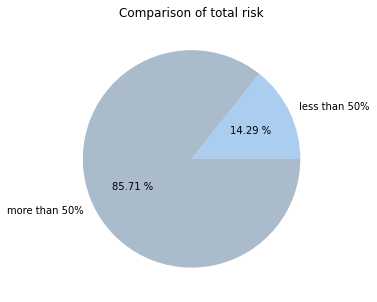

In [39]:
less = df.loc[df['Total_Risk1'] >= 0.5].count()[0]
more = df.loc[df['Total_Risk1'] < 0.5].count()[0]

plt.figure(figsize=(8,5))

labels = ['less than 50%', 'more than 50%']
colors = ['#abcdef', '#aabbcc']

plt.pie([less, more], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Comparison of total risk')

plt.show()

#### The pie chart shows that 85.71% approximately 86% of risk values are more than 50%.

### Bivariate exploration

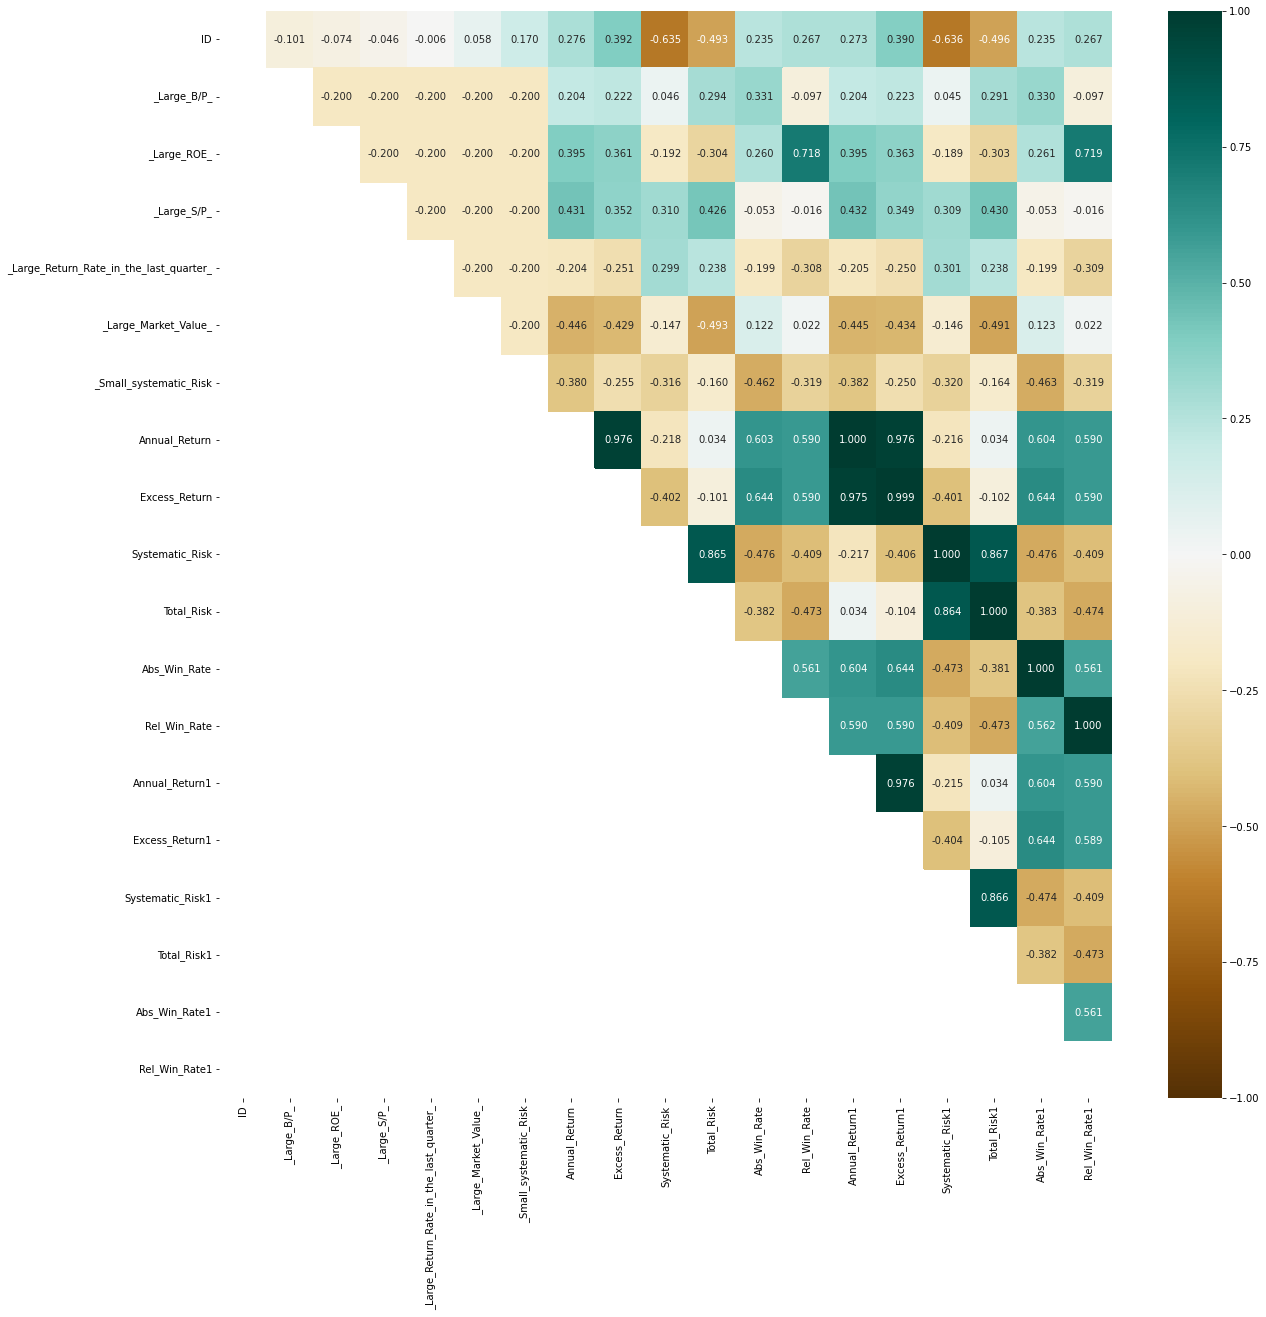

In [22]:
#Convert all values to numeric
df = df.apply(pd.to_numeric)

# plotting a correlation matrix as a heatmap;
plt.figure(figsize= (20, 20))
mask = np.tril(np.ones_like(df.corr(), dtype= bool))
sns.heatmap(df.corr(), cmap='BrBG', mask=mask, vmin=-1, vmax=1, fmt = '.3f', annot=True)
plt.show()

#Dropping orginal portfolio investment indicator as we already have the Normalised investment indicators

In [23]:
df1 = df.drop(columns = ['Annual_Return', 'Excess_Return', 'Systematic_Risk', 'Total_Risk', 'Abs_Win_Rate', 'Rel_Win_Rate'])
df1.head(3)

,ID,_Large_B/P_,_Large_ROE_,_Large_S/P_,_Large_Return_Rate_in_the_last_quarter_,_Large_Market_Value_,_Small_systematic_Risk,Annual_Return1,Excess_Return1,Systematic_Risk1,Total_Risk1,Abs_Win_Rate1,Rel_Win_Rate1
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471


### C) Regression Analysis
#### predict Abs_Win_Rate usig Linear model



In [24]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

In [25]:
!pip install catboost #type of regression algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [26]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [27]:
df1.columns

Index(['ID', '_Large_B/P_', '_Large_ROE_', '_Large_S/P_',
       '_Large_Return_Rate_in_the_last_quarter_', '_Large_Market_Value_',
       '_Small_systematic_Risk', 'Annual_Return1', 'Excess_Return1',
       'Systematic_Risk1', 'Total_Risk1', 'Abs_Win_Rate1', 'Rel_Win_Rate1'],
      dtype='object')

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
normalised_df1= pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

In [30]:
# Train-Test Split
X = df1.drop(['Abs_Win_Rate1'], axis=1)
y = df1["Abs_Win_Rate1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     

First we slipt the data into depent variable y, in this case it's **Abs_Win_Rate1** the variable that we want to predict, and independent variables X, where we performed a features selection based on the correlation matrix to optimize the learning and to avoid the heteroskedacity, we didn't include many columns for that reason.

In [31]:

models = {'XGBoost Regressor' : XGBRegressor(),
          'DecisionTree Regressor' : DecisionTreeRegressor(),
          'Random Forest' : RandomForestRegressor(),
          'CatBoost' : CatBoostRegressor(),
          'gradeientboosting' : GradientBoostingRegressor(),
       'ridge' : Ridge(),
       'SVR' : SVR(),
       'LinearRegression' : LinearRegression(),
          }

In [32]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  fits and evaluates given ml models
  models : a dictionary of different scikit learn machine learning models
  X_train : training data(no labels)
  X_test : testing data(no labels)
  y_train : training labels
  y_test : testing labels
  """
  #setting random seed for reproducibility so we get same no anytime we run a new code
  np.random.seed(42)

  #Making a dictionary to keep model scores
  model_scores = {}

   #Looping through models
  for name, model in models.items():

  #fitting the model to the data
      model.fit(X_train, y_train)
  #evaluating the model and appending its score to model_scores
      model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [33]:
model_scores = fit_and_score(models = models,
                     X_train = X_train,
                     X_test = X_test,
                      y_train = y_train,
                     y_test = y_test)
model_scores

[01:12:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.025505
0:	learn: 0.1013845	total: 54.1ms	remaining: 54.1s
1:	learn: 0.1005540	total: 54.7ms	remaining: 27.3s
2:	learn: 0.0999420	total: 57.7ms	remaining: 19.2s
3:	learn: 0.0992158	total: 58.2ms	remaining: 14.5s
4:	learn: 0.0982898	total: 58.4ms	remaining: 11.6s
5:	learn: 0.0977005	total: 61.7ms	remaining: 10.2s
6:	learn: 0.0969152	total: 62.5ms	remaining: 8.87s
7:	learn: 0.0962103	total: 63.3ms	remaining: 7.85s
8:	learn: 0.0953563	total: 64ms	remaining: 7.05s
9:	learn: 0.0946829	total: 64.7ms	remaining: 6.4s
10:	learn: 0.0939038	total: 65.2ms	remaining: 5.86s
11:	learn: 0.0932754	total: 65.6ms	remaining: 5.4s
12:	learn: 0.0924860	total: 66.1ms	remaining: 5.02s
13:	learn: 0.0916437	total: 66.7ms	remaining: 4.69s
14:	learn: 0.0909981	total: 67.8ms	remaining: 4.45s
15:	learn: 0.0902292	total: 68.8ms	remaining: 4.23s
16:	learn: 0.0895103	tota

{'XGBoost Regressor': 0.4893827873169776,
 'DecisionTree Regressor': -0.309164149043303,
 'Random Forest': 0.35924924471299136,
 'CatBoost': 0.5066279465594087,
 'gradeientboosting': 0.3972664020324649,
 'ridge': 0.7051131719147254,
 'SVR': -0.05518071987522877,
 'LinearRegression': 0.8187618435005503}

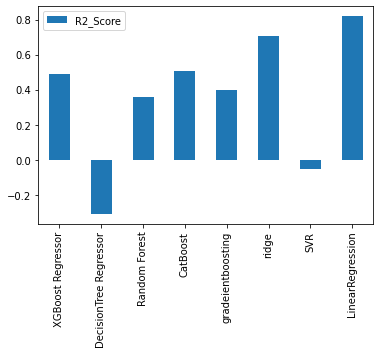

In [34]:
#in ml regression the default EVALUATION is R2SCORE YL in classification it is ACCURACY
model_compare = pd.DataFrame(model_scores, index = ['R2_Score'])
model_compare.T.plot.bar();
 #T means Transpose, so asto improvre the plot

#### The scores of all the different regression models used were compared. It is clearly evident that the Linear model gave the best r2 score.

In [35]:
# we fit our Model
from sklearn.linear_model import LinearRegression 

Lr_model = LinearRegression()  
Lr_model.fit(X_train, y_train)     

LinearRegression()

In [36]:
# Predictions
y_pred = Lr_model.predict(X_test)

In [37]:
# Model evaluation 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred) #default=True
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R2:",r2)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

R2: 0.8187618435005503
MAE: 0.044404891695385675
MSE: 0.0034077063082405402
RMSE: 0.05837556259463835


#### The linear regression model scored 82%, it seems a good score, we can improve it by adding more features to the model but we have to choose carefully. Let's visualize the errors now.

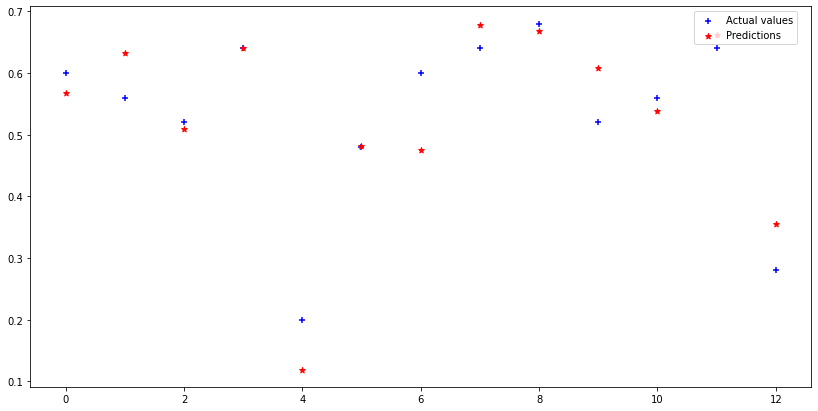

In [38]:
# we make a df
Err = pd.DataFrame({'Actual': list(y_test), 'Predicted': list(y_pred)})

# we plot the errors
fig, ax = plt.subplots(figsize = (14,7))

x = np.arange(0, len(Err), 1)
ax.scatter(x, Err['Actual'], c='b', label='Actual values', marker='+')
ax.scatter(x, Err["Predicted"], c='r', label='Predictions', marker='*')
ax.legend(loc=(0.85, 0.9))

#### When we compare the actual and predicted values of absolute win rates by visualizing the errors, we observe that our predictions are exquisite.

# Conclusion

#### According to the evaluation of performance prediction models based on regression methods, absolute win rates can be predicted more precisely than relative win rates. These may be attributed to the reason that an individual firm’s fundamental analysis is only effective for stock picking but not useful for market timing. The accuracy of the results largely depends on the quality of the dataset fed into the model. Portfolio performance measures are a key factor in the investment decision. These tools also assist to provide insights and information to investors.

# Team Members

#### Hannah Kasali (Team Leader)
#### Christian Tan (Assistant Team Leader)
#### Apurv Deshpande (Query Analyst)
#### Sharon Ifeanyichukwu Dim
#### Zakaria Jnayni
#### Lovette Duke
#### Fachi